In [ ]:
import os
#linear algebra
import numpy as np 
#data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
traindata = pd.read_csv('/content/sample_data/CPU_INFO.csv')
traindata.shape

(26679, 10)

In [ ]:
X_train = traindata.iloc[:,0:9]
Y_train = traindata.iloc[:,9]
# print(traindata.dtypes)
# print(X_train.head)
# print(Y_train.head)

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3,
                                                    shuffle=True, random_state=201)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18675, 9)
(8004, 9)
(18675,)
(8004,)


In [ ]:
x_train = np.array(x_train,ndmin = 4)
x_test = np.array(x_test,ndmin = 4)
y_train = np.array(y_train,ndmin = 4)
y_test = np.array(y_test,ndmin = 4)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1, 1, 18675, 9)
(1, 1, 8004, 9)
(1, 1, 1, 18675)
(1, 1, 1, 8004)


In [ ]:
x_train = x_train.reshape(18675,3,3,1)
x_test = x_test.reshape(8004,3,3,1)
y_train = y_train.reshape(18675,1)
y_test = y_test.reshape(8004,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18675, 3, 3, 1)
(8004, 3, 3, 1)
(18675, 1)
(8004, 1)


In [ ]:
#def create_model():
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', 
                input_shape=(3, 3, 1)))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(12, input_shape=(1,128), activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#adam = Adam(lr=1e-5)
#model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

model.build()
model.summary()

#return model

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 3, 3, 8)           80        
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 1, 1, 8)           0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_105 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_106 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 7         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_______________________________________________________

In [ ]:
adam = Adam(lr=1e-5)
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [ ]:
# model.fit(x_train, y_train, epochs=1,validation_data=(x_test, y_test),callbacks=[reduce_lr])
model.fit(x_train, y_train, epochs=1,validation_data=(x_test, y_test))

584/584 [==============================] - 1s 2ms/step - loss: 394171.5000 - accuracy: 0.6430 - val_loss: 290303.0000 - val_accuracy: 0.6419


In [ ]:
score = model.evaluate(x_train, y_train)

584/584 [==============================] - 0s 817us/step - loss: 289435.5312 - accuracy: 0.6430


In [ ]:
score

[289435.53125, 0.6429986357688904]

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define evaluation
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['batch_size'] = [100, 1000, 10000]
space['epochs'] = [10, 50, 100]
# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# execute search
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', 
                  input_shape=(3, 3, 1)))
  model.add(MaxPool2D(strides=2))  
  model.add(Flatten())
  model.add(Dense(1024, input_shape=(1,128), activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(1, activation='softmax'))
  
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
# define search
search = RandomizedSearchCV(model, param_grid, n_iter=5, scoring='accuracy', n_jobs=-1, cv=3, random_state=1)
# execute search
result = search.fit(x_train, y_train)
# summarize result
# print('Best Score: %s' % result.best_score_)
# print('Best Hyperparameters: %s' % result.best_params_)

# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
X_train = np.array(X_train,ndmin = 4)
Y_train = np.array(Y_train,ndmin = 4)

print(X_train.shape)
print(Y_train.shape)

X_train = X_train.reshape(26679 ,3,3,1)
Y_train = Y_train.reshape(26679 ,1)

print(X_train.shape)
print(Y_train.shape)

(1, 1, 26679, 9)
(1, 1, 1, 26679)
(26679, 3, 3, 1)
(26679, 1)


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing

def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', 
                  input_shape=(3, 3, 1)))
  model.add(MaxPool2D(strides=2))  
  model.add(Flatten())
  model.add(Dense(12, input_shape=(1,128), activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))  
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'optimizer': 'Nadam'}
0.023989 (0.033925) with: {'optimizer': 'SGD'}
0.357322 (0.455391) with: {'optimizer': 'RMSprop'}
0.357322 (0.455391) with: {'optimizer': 'Adagrad'}
0.357322 (0.455391) with: {'optimizer': 'Adadelta'}
0.357322 (0.455391) with: {'optimizer': 'Adam'}
0.357322 (0.455391) with: {'optimizer': 'Adamax'}
0.976011 (0.033925) with: {'optimizer': 'Nadam'}


In [ ]:
# Use scikit-learn to grid search the learning rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Nadam
# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'learn_rate': 0.001}
0.976011 (0.033925) with: {'learn_rate': 0.001}
0.642678 (0.455391) with: {'learn_rate': 0.01}
0.309344 (0.437479) with: {'learn_rate': 0.1}
0.309344 (0.437479) with: {'learn_rate': 0.2}
0.023989 (0.033925) with: {'learn_rate': 0.3}


In [ ]:
# Use scikit-learn to grid search the learning rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation=activation, 
                     input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation=activation))
    model.add(Dense(6, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
activation = ['relu', 'hard_sigmoid']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'activation': 'relu'}
0.976011 (0.033925) with: {'activation': 'relu'}
0.976011 (0.033925) with: {'activation': 'hard_sigmoid'}


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation=activation))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'activation': 'tanh'}
0.642678 (0.455391) with: {'activation': 'softmax'}
0.357322 (0.455391) with: {'activation': 'softplus'}
0.357322 (0.455391) with: {'activation': 'softsign'}
0.357322 (0.455391) with: {'activation': 'relu'}
0.976011 (0.033925) with: {'activation': 'tanh'}
0.023989 (0.033925) with: {'activation': 'sigmoid'}
0.642678 (0.455391) with: {'activation': 'hard_sigmoid'}
0.642678 (0.455391) with: {'activation': 'linear'}


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(neurons, input_shape=(1,128), activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 12, 15, 20, 25, 30, 50, 100]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'neurons': 12}
0.357322 (0.455391) with: {'neurons': 1}
0.642678 (0.455391) with: {'neurons': 5}
0.690656 (0.437479) with: {'neurons': 10}
0.976011 (0.033925) with: {'neurons': 12}
0.976011 (0.033925) with: {'neurons': 15}
0.976011 (0.033925) with: {'neurons': 20}
0.642678 (0.455391) with: {'neurons': 25}
0.357322 (0.455391) with: {'neurons': 30}
0.642678 (0.455391) with: {'neurons': 50}
0.309344 (0.437479) with: {'neurons': 100}


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Adam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10, 12, 15, 20, 25, 30, 50, 100]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'neurons': 6}
0.023989 (0.033925) with: {'neurons': 1}
0.642678 (0.455391) with: {'neurons': 5}
0.976011 (0.033925) with: {'neurons': 6}
0.642678 (0.455391) with: {'neurons': 10}
0.642678 (0.455391) with: {'neurons': 12}
0.976011 (0.033925) with: {'neurons': 15}
0.309344 (0.437479) with: {'neurons': 20}
0.357322 (0.455391) with: {'neurons': 25}
0.690656 (0.437479) with: {'neurons': 30}
0.642678 (0.455391) with: {'neurons': 50}
0.357322 (0.455391) with: {'neurons': 100}


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'neurons': 6}
0.023989 (0.033925) with: {'neurons': 1}
0.642678 (0.455391) with: {'neurons': 5}
0.976011 (0.033925) with: {'neurons': 6}
0.357322 (0.455391) with: {'neurons': 10}


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Nadam

from sklearn.metrics import precision_score, make_scorer
precision = make_scorer(precision_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=precision)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Precision Score: %f" % (grid_result.best_score_))

Precision Score: 0.953749


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Nadam

from sklearn.metrics import recall_score, make_scorer
recall = make_scorer(recall_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=recall)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Recall Score: %f" % (grid_result.best_score_))

Recall Score: 0.976011


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Nadam

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='weighted')  

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring=f1)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("F1 Score: %f" % (grid_result.best_score_))

F1 Score: 0.964464


In [ ]:
# Use scikit-learn to grid search the number of neurons
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from sklearn import preprocessing
from keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(3, 3, 1)))
    model.add(MaxPool2D(strides=2))  
    model.add(Flatten())
    model.add(Dense(12, input_shape=(1,128), activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='tanh'))
    # Compile model
    optimizer = Nadam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10000, verbose=0)
# define the grid search parameters
neurons = [1, 5, 6, 10]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976011 using {'neurons': 5}
0.309344 (0.437479) with: {'neurons': 1}
0.976011 (0.033925) with: {'neurons': 5}
0.642678 (0.455391) with: {'neurons': 6}
0.357322 (0.455391) with: {'neurons': 10}


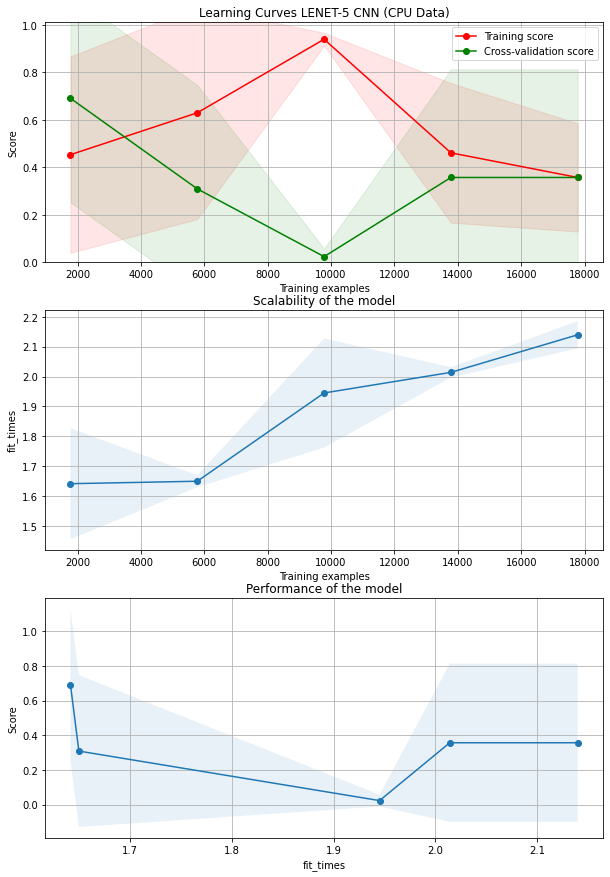

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    return plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves LENET-5 CNN (CPU Data)"
plot_learning_curve(model, title, X_train, Y_train, axes=axes[:], ylim=(0.0, 1.01),
                    cv=3, n_jobs=-1)

plt.show()

In [ ]:
y_pred = grid_result.best_estimator_.predict(X_train)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, y_pred))

[[ 9533     0]
 [17146     0]]
